C:\Users\Raven\AppData\Local\Temp\ipykernel_10416\1730688193.py:4: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Divar.csv')


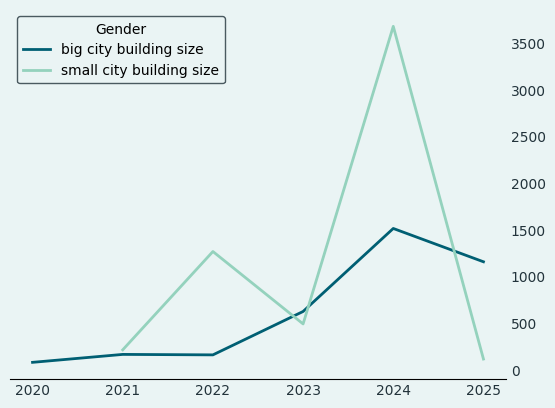

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../Divar.csv')

advertise_df = df.copy()
advertise_df = advertise_df[['city_slug', 'land_size', 'building_size', 'cat3_slug', 'cat2_slug', 'created_at_month']]

advertise_df["created_at_month"] = pd.to_datetime(advertise_df["created_at_month"])

city_df = (
    pd.read_csv('../iran_city_classification.csv')
      .rename(columns={'نام شهر': 'city_name', 'دسته‌بندی': 'category_name'})
      .replace({'شهر کوچک': 'small_city', 'کلان‌شهر': 'big_city'})
)

advertise_df = (
    pd.merge(advertise_df, city_df, left_on="city_slug", right_on="city_name", how="inner")
      .drop('city_slug', axis=1)
)

residential_df = advertise_df[
    advertise_df['cat2_slug'].isin(['residential-rent', 'residential-sell'])
]
residential_df = residential_df[
    (residential_df['building_size'].notna()) &
    (residential_df['building_size'] > 0) 
]

def group_building_size(df, city_type):
    grouped = (
        df[df['category_name'] == city_type]
        .set_index("created_at_month")
        .sort_index()
        .resample("YE")['building_size']
        .mean()
        .ffill()
    )
    grouped.index = grouped.index.year
    return grouped


groupedBigBuildingSize = group_building_size(residential_df, 'big_city')
groupedSmallBuildingSize = group_building_size(residential_df, 'small_city')

fig, ax = plt.subplots()
fig.patch.set_facecolor('#EAF4f4')
ax.set_facecolor('#EAF4f4')

ax.plot(groupedBigBuildingSize.index, groupedBigBuildingSize.values, color='#005f73', label='big city building size', linewidth=2)
ax.plot(groupedSmallBuildingSize.index, groupedSmallBuildingSize.values, color='#94d2bd', label='small city building size', linewidth=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis='x', length=0, colors='#22333b')
ax.tick_params(axis='y', length=0, colors='#22333b')

ax.yaxis.tick_right()  

legend = ax.legend(title='Gender')
legend.get_frame().set_facecolor('#EAF4f4')
legend.get_frame().set_edgecolor('#22333b')

plt.show()